# Task 4: Fraud Detection Model - Data Preparation and Model Training

**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

**Data Preparation**

In [2]:
data = pd.read_csv('../data/data.csv')
data_encoded = pd.get_dummies(data, columns=['ProductCategory', 'ProviderId', 'ChannelId'], drop_first=True)

In [3]:
# Handling missing values only for numeric columns
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_encoded[numeric_cols] = data_encoded[numeric_cols].fillna(data_encoded[numeric_cols].mean())

**Defining Features and Target Variable**

In [4]:
# `X` is the feature matrix and `y` is the target variable
X = data_encoded.drop(['FraudResult'], axis=1)
y = data_encoded['FraudResult']

**plitting the Data into Training and Test Sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Handling Non-Numeric Columns Before Scaling**

In [6]:
# Extract numeric columns and apply scaling using StandardScaler
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

In [7]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

**Model Training**

**Logistic Regression**

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
# Predict on the test set for Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)

In [10]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9983797627136362
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.78      0.19      0.31        36

    accuracy                           1.00     19133
   macro avg       0.89      0.60      0.66     19133
weighted avg       1.00      1.00      1.00     19133



**Adding ROC-AUC Score for Logistic Regression**

In [11]:
roc_auc_log = roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
print(f"Logistic Regression ROC-AUC: {roc_auc_log}")

Logistic Regression ROC-AUC: 0.9993316285862235


**Decision Tree**

In [12]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_numeric, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Predict on the test set for Decision Tree
y_pred_tree = tree_model.predict(X_test_numeric)

In [14]:
# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9998432028432551
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      0.92      0.96        36

    accuracy                           1.00     19133
   macro avg       1.00      0.96      0.98     19133
weighted avg       1.00      1.00      1.00     19133



**Adding ROC-AUC Score for Decision Tree**

In [15]:
roc_auc_tree = roc_auc_score(y_test, tree_model.predict_proba(X_test_numeric)[:, 1])
print(f"Decision Tree ROC-AUC: {roc_auc_tree}")

Decision Tree ROC-AUC: 0.9853409203307094


**Random Forest**

In [16]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train_numeric, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test set for Random Forest
y_pred_forest = forest_model.predict(X_test_numeric)

In [18]:
# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.9998432028432551
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      0.92      0.96        36

    accuracy                           1.00     19133
   macro avg       1.00      0.96      0.98     19133
weighted avg       1.00      1.00      1.00     19133



**Adding ROC-AUC Score for Random Forest**

In [19]:
roc_auc_forest = roc_auc_score(y_test, forest_model.predict_proba(X_test_numeric)[:, 1])
print(f"Random Forest ROC-AUC: {roc_auc_forest}")

Random Forest ROC-AUC: 0.9999919999069079


**Feature Importance for Random Forest**

In [20]:
importances_forest = forest_model.feature_importances_
features = X_train_numeric.columns

In [21]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances_forest})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

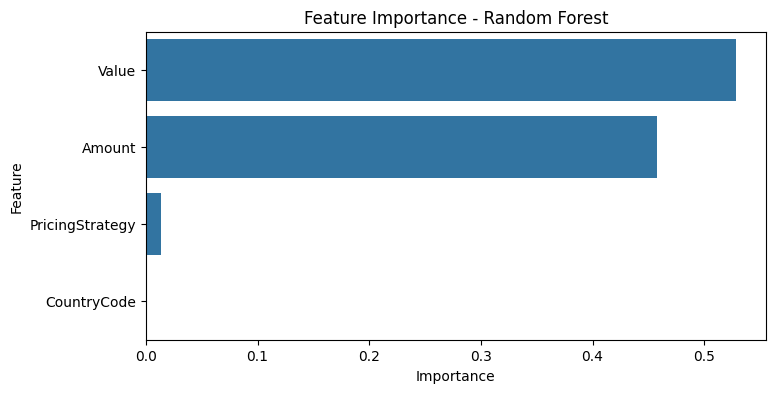

In [25]:
# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

**XGBoost**

In [26]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
# Predict on the test set for XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [28]:
# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9981184341190613
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.00      0.00      0.00        36

    accuracy                           1.00     19133
   macro avg       0.50      0.50      0.50     19133
weighted avg       1.00      1.00      1.00     19133



e:\10 Academy\Bati-Bank-Credit-Scoring\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\10 Academy\Bati-Bank-Credit-Scoring\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\10 Academy\Bati-Bank-Credit-Scoring\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**Adding ROC-AUC Score for XGBoost**

In [29]:
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
print(f"XGBoost ROC-AUC: {roc_auc_xgb}")

XGBoost ROC-AUC: 0.9986138020515147
